In [1]:
import pandas as pd

In [10]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt

## Loaded chosen stock and calculating returns

In [5]:
df = pd.read_csv('/home/user/Module1.csv')

In [6]:
df.head()

,Unnamed: 0,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity,Month,Year,temp,vwap,Day_Perc_Change,Trend
0,375,2018-04-30,1018.58,1034.42,1038.37,1018.30,1.72,Apr,2018,Apr-2018,1018.5800,0.000000,Slight or No Change
1,376,2018-04-27,1031.45,1045.54,1051.69,1027.59,2.04,Apr,2018,Apr-2018,1025.5627,1.263523,Positive
2,377,2018-04-26,1043.31,1033.22,1052.02,1020.45,2.55,Apr,2018,Apr-2018,1032.7349,1.149845,Positive
3,378,2018-04-25,1022.99,1029.75,1036.07,1017.01,2.89,Apr,2018,Apr-2018,1029.6737,-1.947653,Negative
4,379,2018-04-24,1022.64,1059.20,1064.49,1012.86,6.41,Apr,2018,Apr-2018,1026.7855,-0.034213,Slight or No Change


In [7]:
dat = dict()

In [11]:
dat['meandailyret'] = df['Close Price'].pct_change().dropna().mean()
dat['dailyretstd'] = df['Close Price'].pct_change().dropna().std()
dat['meanannualret'] = dat['meandailyret']*252
dat['annualretstd'] = dat['dailyretstd']*np.sqrt(252)

In [12]:
dat

{'meandailyret': 0.0005386440707217609,
 'dailyretstd': 0.023195986099374243,
 'meanannualret': 0.13573830582188376,
 'annualretstd': 0.3682248638031326}

## Loading 5 stocks

In [139]:
files = !ls /home/user/Desktop/Stocks

In [140]:
files

['APOLLOTYRE.csv', 'JUBLFOOD.csv', 'MARUTI.csv', 'MINDTREE.csv', 'RAYMOND.csv']

In [141]:
names = []
close = []
mdr = []
mds = []
mar = []
mas = []

In [142]:
for i in files:    
    df = pd.read_csv('/home/user/Desktop/Stocks/'+i)
    names.append(i.split('.')[0])
    close.append(df['Close Price'])
    mdr.append(df['Close Price'].pct_change().dropna().mean())
    mds.append(df['Close Price'].pct_change().dropna().std())
    mar.append(mdr[-1]*252)
    mas.append(mds[-1]*np.sqrt(252))

In [143]:
returns = pd.DataFrame()
returns['Stock'] = names
returns['Mean Daily Returns'] = mdr
returns['Daily std dev'] = mds
returns['Mean Annual Returns'] = mar
returns['Annual std dev'] = mas

In [144]:
returns

,Stock,Mean Daily Returns,Daily std dev,Mean Annual Returns,Annual std dev
0,APOLLOTYRE,-0.000255,0.019556,-0.064303,0.310445
1,JUBLFOOD,0.001024,0.031539,0.258138,0.500667
2,MARUTI,0.000016,0.014174,0.003921,0.225002
3,MINDTREE,0.001558,0.021512,0.392570,0.341485
4,RAYMOND,0.000278,0.022919,0.070021,0.363834


## Calculating volatility and returns

In [145]:
pf = pd.DataFrame()

In [146]:
for i,j in enumerate(close):
    pf[names[i]] = j

In [147]:
wts = np.array([0.2,0.2,0.2,0.2,0.2])

In [148]:
wts

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [149]:
volatility = np.sqrt(np.dot(wts.T,np.dot(pf.pct_change().cov(),wts)*np.sqrt(252)))

In [150]:
annual_ret = np.sum(pf.pct_change().mean() * wts) * 252

In [151]:
print("Volatility = {}\nAnnual Returns = {}".format(volatility,annual_ret))

Volatility = 0.050059523397023506
Annual Returns = 0.13519942614083183


In [152]:
print('Sharpe Ratio = {}'.format(annual_ret/volatility))

Sharpe Ratio = 2.7007733387423873


## calculating volatility and returns for random weights

In [153]:
op = np.empty((3,1000))
for i in range(1000):
    wts = np.random.random(5)
    wts = wts/np.sum(wts)
    ret =  np.sum(pf.pct_change().mean() * wts) * 252
    std = np.sqrt(np.dot(wts.T,np.dot(pf.pct_change().cov(),wts)*np.sqrt(252)))
    sharpe = ret/std
    op[0,i] = ret
    op[1,i] = std
    op[2,i] = sharpe

In [155]:
dat = pd.DataFrame()
dat['returns'] = op[0]
dat['volatility'] = op[1]
dat['sharpe'] = op[2]

In [157]:
dat.head()

,returns,volatility,sharpe
0,0.124539,0.054697,2.276905
1,0.103432,0.048021,2.153881
2,0.174797,0.058485,2.988745
3,0.107238,0.049954,2.146741
4,0.155656,0.050267,3.096578


## Plotting the values and marking highest sharpe ratio and lowest volatility

In [159]:
maxm = dat.iloc[dat['sharpe'].idxmax()]
minm = dat.iloc[dat['volatility'].idxmin()]

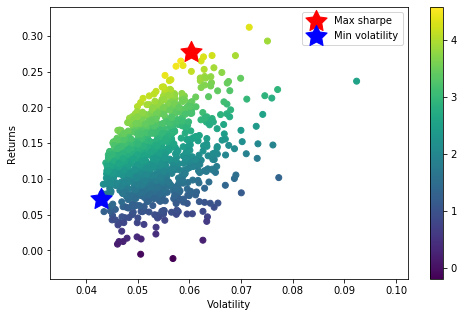

In [168]:
plt.figure(figsize = (8,5))
plt.scatter(dat['volatility'],dat['returns'],c = dat['sharpe'])
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(maxm['volatility'],maxm['returns'],color = 'r',s = 500,marker = (5,1,0),label = 'Max sharpe')
plt.scatter(minm['volatility'],minm['returns'],color = 'b',s = 500,marker = (5,1,0),label = 'Min volatility')
plt.legend()